In [ ]:
import pandas as pd
df = pd.read_csv('US_Accidents_Dec20.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
df.head(3)

In [3]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors = 'coerce') #THIS WHOLE CELL IS EDITING THE DATE AND TIME COLUMNS
df['End_Time'] = pd.to_datetime(df['End_Time'], errors = 'coerce')
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.strftime('%B')
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1, 'm'))

NameError: name 'pd' is not defined

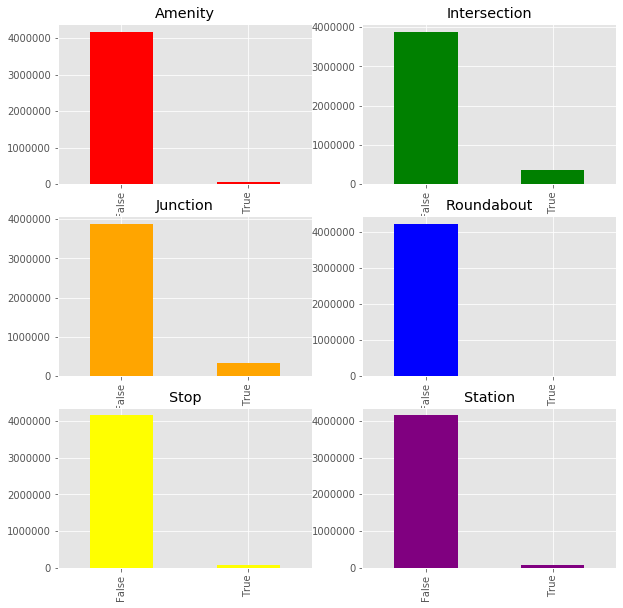

In [5]:
fig = plt.figure(figsize=(10, 10)) #PLOTTING SOME GENERAL STATISTICS
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
df['Amenity'].value_counts().plot(kind='bar', color='red', title='Amenity')
plt.subplot2grid(fig_dims, (0,1))
df['Crossing'].value_counts().plot(kind='bar', color='green', title='Intersection')
plt.subplot2grid(fig_dims, (1,0))
df['Junction'].value_counts().plot(kind='bar', color='orange', title='Junction')
plt.subplot2grid(fig_dims, (1,1))
df['Roundabout'].value_counts().plot(kind='bar', color='blue', title='Roundabout')
plt.subplot2grid(fig_dims, (2,0))
df['Stop'].value_counts().plot(kind='bar', color='yellow', title='Stop')
plt.subplot2grid(fig_dims, (2,1))
df['Station'].value_counts().plot(kind='bar', color='purple', title='Station')

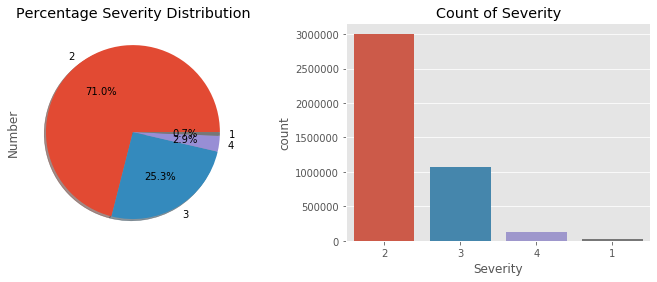

In [6]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df['Severity'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Number')
sns.countplot('Severity', data=df, ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

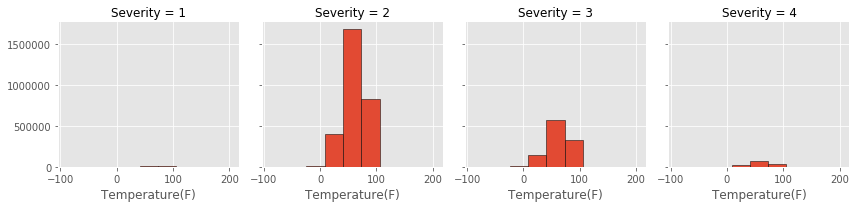

In [7]:
bins = np.linspace(df['Temperature(F)'].min(), df['Temperature(F)'].max(), 10)
g = sns.FacetGrid(df, col='Severity', palette="Set2", col_wrap=4)
g.map(plt.hist, 'Temperature(F)', bins=bins, ec="k")
plt.show()

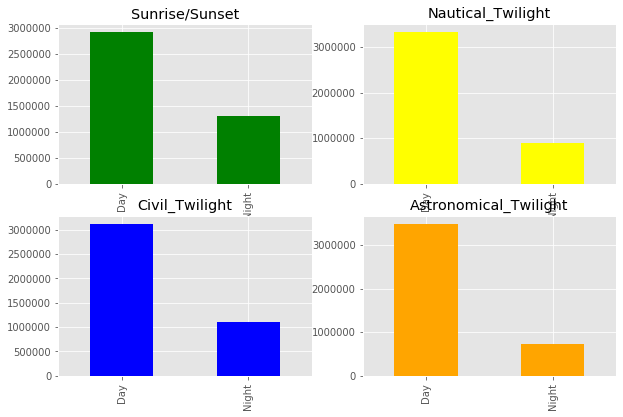

In [8]:
fig = plt.figure(figsize=(10,10))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0,0))
df['Sunrise_Sunset'].value_counts().plot(kind='bar', color='green', title="Sunrise/Sunset")
plt.subplot2grid(fig_dims, (0,1))
df['Nautical_Twilight'].value_counts().plot(kind='bar',color='yellow',title='Nautical_Twilight')
plt.subplot2grid(fig_dims, (1,0)) 
df['Civil_Twilight'].value_counts().plot(kind='bar',color='blue',title='Civil_Twilight')
plt.subplot2grid(fig_dims, (1,1))
df['Astronomical_Twilight'].value_counts().plot(kind='bar',color='orange',title='Astronomical_Twilight')

In [4]:
df.groupby("Month").size().plot(kind="line", color='red', title='Comparing Months')

NameError: name 'df' is not defined

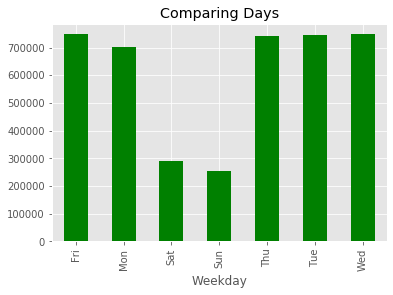

In [10]:
df.groupby("Weekday").size().plot(kind="bar",color='green',title='Comparing Days')

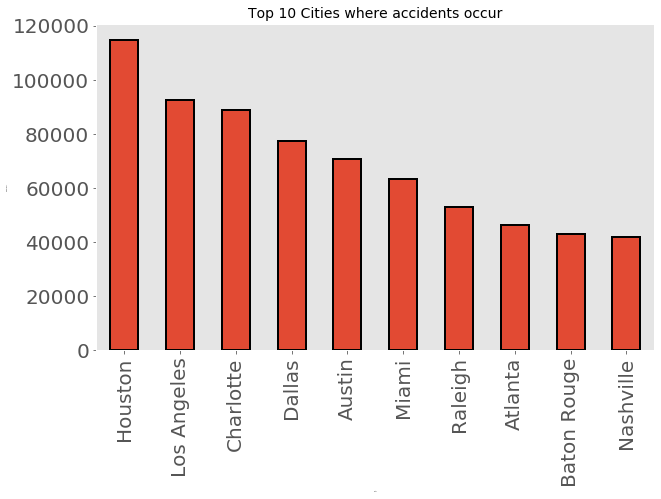

In [11]:
fig, ax=plt.subplots(figsize=(10,6))
df['City'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('City', fontsize=2)
plt.ylabel('Number',fontsize=2)
ax.tick_params(labelsize=20)
plt.title('Top 10 Cities where accidents occur', fontsize=14)
plt.grid()
plt.ioff()

In [13]:
df[td][df[td]<=0]
neg_outliers=df[td]<=0
df[neg_outliers] = np.nan

df.dropna(subset=[td],axis=0,inplace=True)

n=3
median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n
df[outliers] = np.nan
df[td].fillna(median, inplace=True)

df.info()

NameError: name 'df' is not defined

In [4]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.info()

NameError: name 'pd' is not defined

In [9]:
df=df_dummy #Create the training/testing data
target='Severity'
y = df[target]
x = df.drop(target, axis=1)
X_train, X_test, y_train, y_tst = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
ML_Operations=['Logistic Regression', 'Decision Trees', 'K-Nearest Neighbors']
accuracylist = []

NameError: name 'df_dummy' is not defined

In [10]:
lr = LogisticRegression(random_state=0) #Logistic Regression Calculation
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('The accuracy_score of logistics regression is: {:.3f}.'.form at(acc))

SyntaxError: invalid syntax (<ipython-input-10-97aa099cfcd8>, line 6)

In [3]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)
print('The accuacy score of Decision Tree entropy is: {:.3f}.' .format(accuracy_entropy))
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini',random_state=1)
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('The accuracy_score of Decision Tree gini is: {:.3f}.' .format(accuracy_gini))




NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy.score: {:.3f}.'.format(acc))


In [ ]:
%%HTML <div class='tableauPlaceholder' id='viz1618767951576' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DashboardforUIowaHacks&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DashboardforUIowaHacks&#47;Dashboard1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DashboardforUIowaHacks&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1618767951576');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='610px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='610px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='950px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>